<a href="https://colab.research.google.com/github/anirbanghoshsbi/.github.io/blob/master/Economic_Indicators.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [114]:
!pip install yfinance

In [115]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns
%matplotlib inline
plt.rcParams["figure.figsize"]=(10,10)
matplotlib.style.use('fivethirtyeight')

In [116]:
cpi=pd.read_csv('/content/india cpi.txt',sep='\t')

In [146]:
nifty=yf.download('^nsei',start='2010-06-01')
nifty=nifty.resample('M').last()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-30,5254.250000,5320.350098,5210.000000,5312.500000,5312.500000,0
2010-07-31,5408.399902,5413.250000,5349.200195,5367.600098,5367.600098,0
2010-08-31,5413.549805,5413.899902,5348.899902,5402.399902,5402.399902,0
2010-09-30,5991.350098,6048.450195,5963.600098,6029.950195,6029.950195,0
2010-10-31,6021.149902,6032.649902,5937.100098,6017.700195,6017.700195,0
...,...,...,...,...,...,...
2021-05-31,15437.750000,15606.349609,15374.000000,15582.799805,15582.799805,436000
2021-06-30,15776.900391,15839.099609,15708.750000,15721.500000,15721.500000,262400
2021-07-31,15800.599609,15862.799805,15744.849609,15763.049805,15763.049805,400000


In [117]:
cpi['Actual']=cpi['Actual'].str.replace(r'\%', '')

In [118]:
cpi['Forecast']=cpi['Forecast'].str.replace(r'\%', '')
cpi['Previous']=cpi['Previous'].str.replace(r'\%', '')

In [140]:
cpi.tail(2)

,Release Date,Time,Actual,Forecast,Previous,Unnamed: 5,diff
date,,,,,,,
2010-08-02,"Aug 02, 2010",09:00,13.7,13.7,13.9,NaN,0.0
2010-06-30,"Jun 30, 2010",09:00,13.9,13.2,13.3,NaN,0.7


In [120]:
cpi['Actual'].replace(r'^\s*$', np.nan, regex=True,inplace=True)
cpi['Forecast'].replace(r'^\s*$', np.nan, regex=True,inplace=True)
cpi['Previous'].replace(r'^\s*$', np.nan, regex=True,inplace=True)

In [121]:
cpi['Actual'].fillna(method='bfill',inplace=True)
cpi['Forecast'].fillna(method='bfill',inplace=True)
cpi['Previous'].fillna(method='bfill',inplace=True)

In [122]:
cpi.head(2)

,Release Date,Time,Actual,Forecast,Previous,Unnamed: 5
0,"Sep 13, 2021 (Aug)",08:00,5.59,5.78,5.59,NaN
1,"Aug 12, 2021 (Jul)",08:00,5.59,5.78,6.26,NaN


In [123]:
cpi['Actual']=cpi.Actual.astype(float)
cpi['Forecast']=cpi.Forecast.astype(float)
cpi['Previous']=cpi.Previous.astype(float)

In [124]:
cpi.head(2)

,Release Date,Time,Actual,Forecast,Previous,Unnamed: 5
0,"Sep 13, 2021 (Aug)",08:00,5.59,5.78,5.59,NaN
1,"Aug 12, 2021 (Jul)",08:00,5.59,5.78,6.26,NaN


In [125]:
cpi['Release Date'].head(1)

0    Sep 13, 2021 (Aug)
Name: Release Date, dtype: object

In [126]:
cpi['date']=cpi['Release Date'].str.split("(").str[0]

In [127]:
cpi['date']=pd.to_datetime(cpi['date'])

In [128]:
cpi.set_index('date',inplace=True)

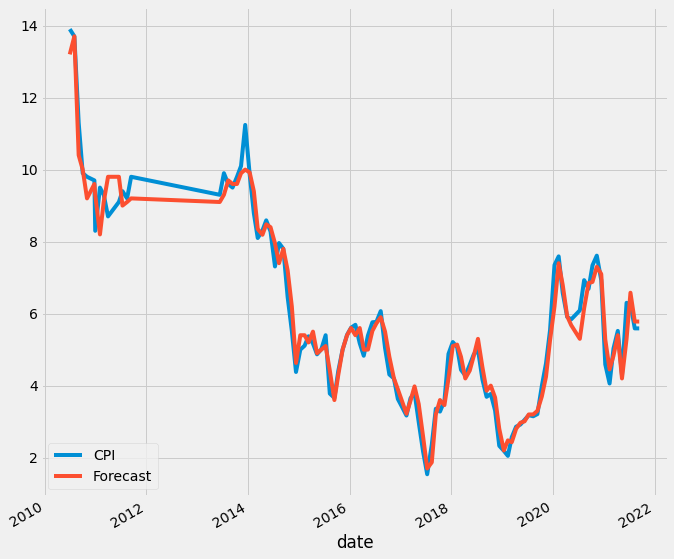

In [130]:
cpi.Actual.plot(label='CPI')
cpi.Forecast.plot(label='Forecast')
#cpi.Previous.plot(label='Previous')
plt.legend(loc='lower left')
plt.show()

In [132]:
cpi.head(2)

,Release Date,Time,Actual,Forecast,Previous,Unnamed: 5
date,,,,,,
2021-09-13,"Sep 13, 2021 (Aug)",08:00,5.59,5.78,5.59,NaN
2021-08-12,"Aug 12, 2021 (Jul)",08:00,5.59,5.78,6.26,NaN


In [133]:
cpi['diff']=cpi['Actual']-cpi['Forecast']

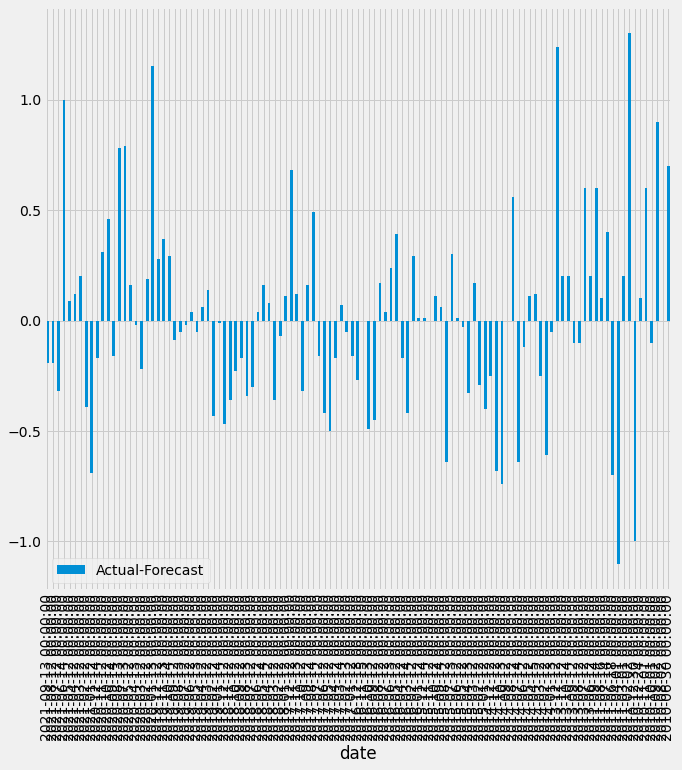

In [150]:
cpi['diff'].plot(kind='bar',label='Actual-Forecast')
plt.legend(loc='lower left')
plt.show()

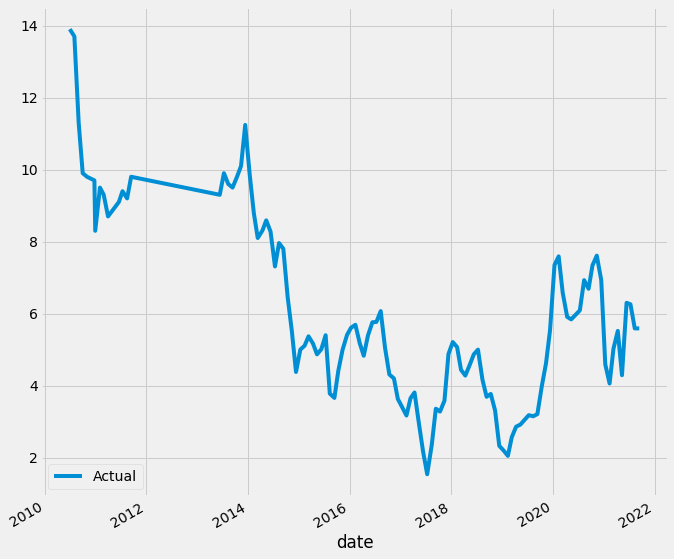

In [157]:
cpi['Actual'].plot(kind='line',label='Actual',sharey=True)
#nifty['Close'].plot(kind='line',label='Nifty')
plt.legend(loc='lower left')
plt.show()

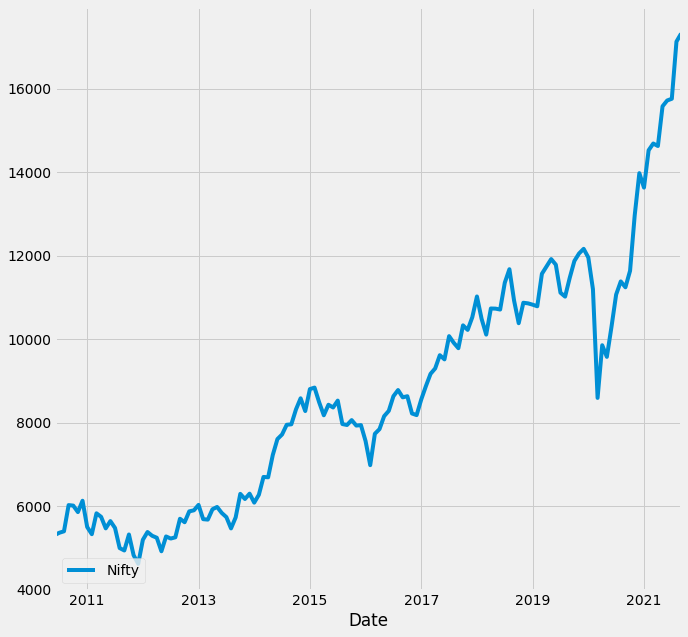

In [155]:
nifty['Close'].plot(kind='line',label='Nifty')
plt.legend(loc='lower left')
plt.show()

In [160]:
concated_data=pd.concat([nifty.Close,cpi['Actual']], axis=1)

In [163]:
concated_data=concated_data.fillna(method='bfill')
final=concated_data.resample('M').last()

In [164]:
data_subset = final[['Close','Actual']]

In [165]:

data_subset.columns=['close','close1']

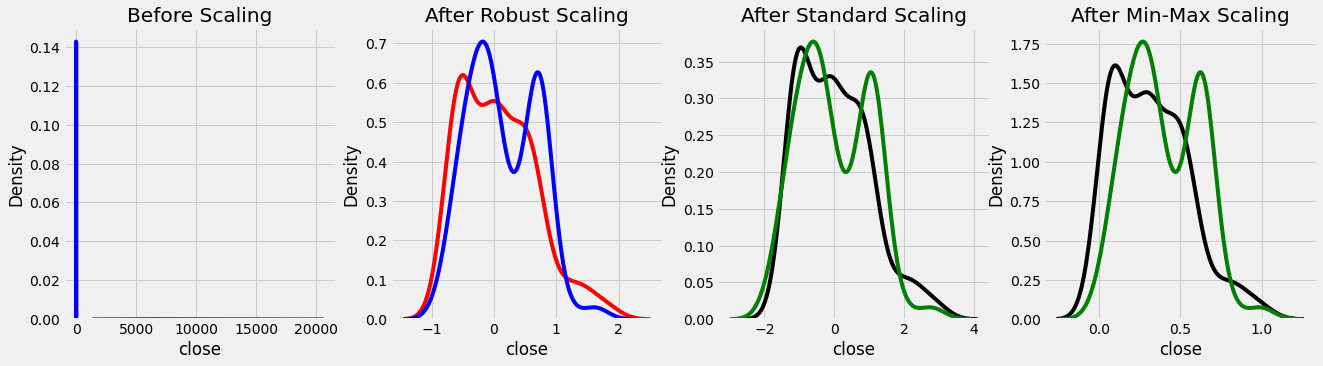

In [166]:
# data
x = data_subset
scaler = preprocessing.RobustScaler()
robust_df = scaler.fit_transform(x)
robust_df = pd.DataFrame(robust_df, columns =['close','close1'])

scaler = preprocessing.StandardScaler()
standard_df = scaler.fit_transform(x)
standard_df = pd.DataFrame(standard_df, columns =['close','close1'])

scaler = preprocessing.MinMaxScaler()
minmax_df = scaler.fit_transform(x)
minmax_df = pd.DataFrame(minmax_df, columns =['close','close1'])

fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols = 4, figsize =(20, 5))
ax1.set_title('Before Scaling')

sns.kdeplot(x['close'], ax = ax1, color ='r')
sns.kdeplot(x['close1'], ax = ax1, color ='b')
ax2.set_title('After Robust Scaling')

sns.kdeplot(robust_df['close'], ax = ax2, color ='red')
sns.kdeplot(robust_df['close1'], ax = ax2, color ='blue')
ax3.set_title('After Standard Scaling')

sns.kdeplot(standard_df['close'], ax = ax3, color ='black')
sns.kdeplot(standard_df['close1'], ax = ax3, color ='g')
ax4.set_title('After Min-Max Scaling')

sns.kdeplot(minmax_df['close'], ax = ax4, color ='black')
sns.kdeplot(minmax_df['close1'], ax = ax4, color ='g')
plt.show()

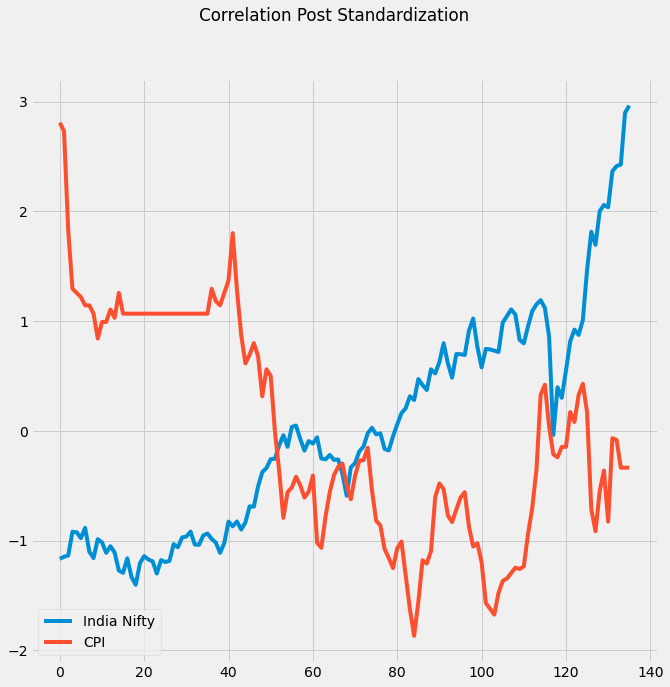

In [167]:
columns=['India Nifty','CPI']
standard_df.columns=columns
standard_df[-1800:].plot(figsize=(10,10))
plt.suptitle('Correlation Post Standardization')
plt.show()

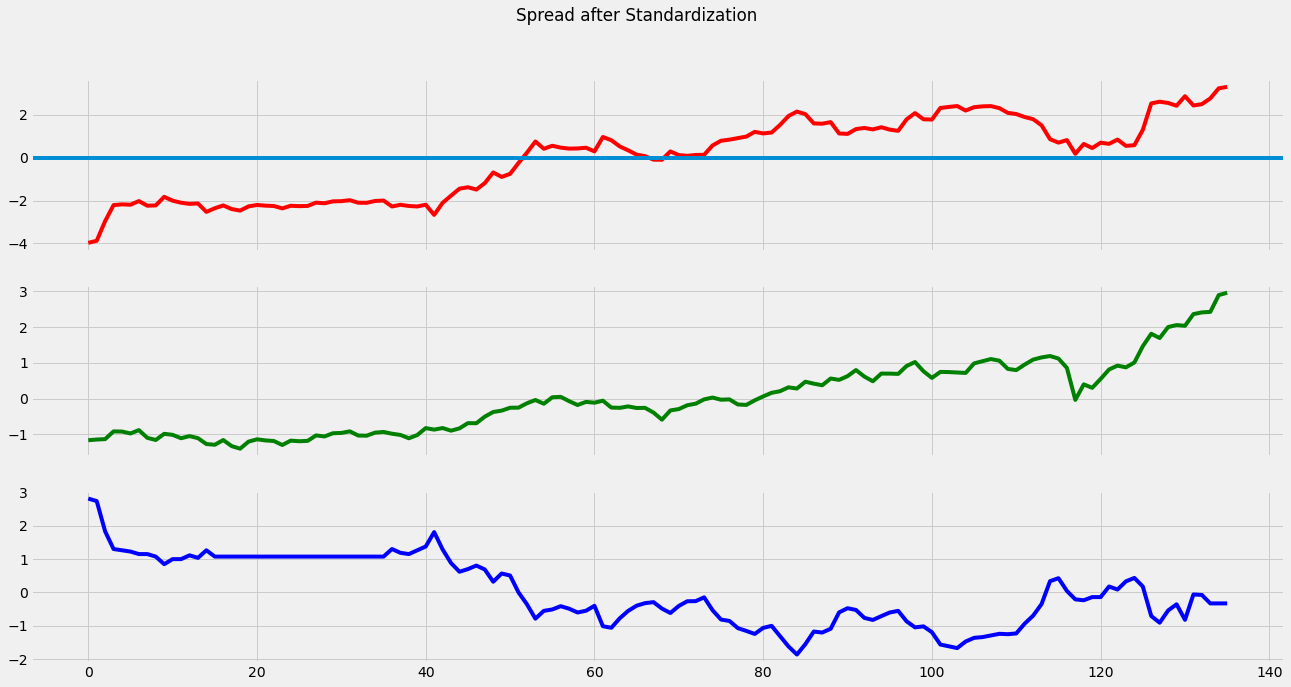

In [170]:
standard_df['diff']=standard_df['India Nifty']-standard_df['CPI']
standard_df['diff']=standard_df['diff'].fillna(method='ffill')
plt.rcParams["figure.figsize"] = (20,10)
fig,ax=plt.subplots(3,1,sharex=True)
ax[0].plot(standard_df['diff'],color='r')
ax[1].plot(standard_df['India Nifty'],color='g')
ax[2].plot(standard_df['CPI'],color='b')
ax[0].axhline(y=0)
plt.suptitle('Spread after Standardization')
plt.show()

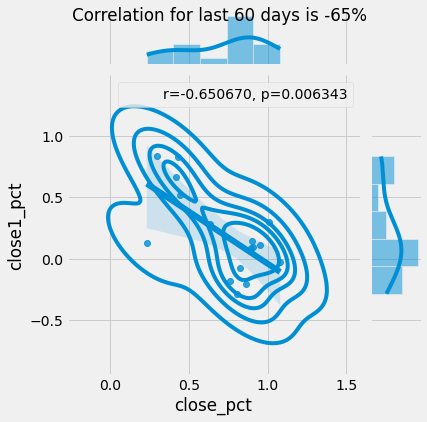

In [172]:
data_subset['close_pct']=data_subset['close'].pct_change(60)
data_subset['close1_pct']=data_subset['close1'].pct_change(60)
from scipy.stats import pearsonr
data_subset.dropna(inplace=True)
g=sns.jointplot(x='close_pct',y='close1_pct',data=data_subset,kind='reg').plot_joint(sns.kdeplot,n_levels=6)
r, p = pearsonr(data_subset['close_pct'], data_subset['close1_pct'])
phantom, = g.ax_joint.plot([], [], linestyle="", alpha=0)
g.ax_joint.legend([phantom],['r={:f}, p={:f}'.format(r,p)])
plt.suptitle(f'Correlation for last 60 days is {round(r*100)}%')
plt.show()